In [9]:
## Imports
from huggingface_hub import hf_hub_download
from llama_cpp import Llama


In [10]:
## Download the GGUF model
model_name = "LoneStriker/BioMistral-7B-DARE-GGUF"
model_file = "BioMistral-7B-DARE-Q4_K_M.gguf" # this is the specific model file we'll use in this example. It's a 4-bit quant, but other levels of quantization are available in the model repo if preferred
model_path = hf_hub_download(model_name, filename=model_file, local_dir="/mnt/extproj/projekte/regulatory_networks/llm_addon/model/")


BioMistral-7B-DARE-Q4_K_M.gguf:   0%|          | 0.00/4.37G [00:00<?, ?B/s]

In [45]:
# GLOBAL VARIABLES
my_model_path = "./model/BioMistral-7B-DARE-Q4_K_M.gguf"
my_model_path = "./model/ggml-model-Q6_K.gguf"
my_model_path = "./model/llama3-openbiollm-8b.Q6_K.gguf"
CONTEXT_SIZE = 512


# LOAD THE MODEL
llm = Llama(
    model_path=my_model_path,
    n_ctx=2048,  # Context length to use
    n_threads=16,            # Number of CPU threads to use
    n_gpu_layers=0,        # Number of model layers to offload to GPU
)


llama_model_loader: loaded meta data with 22 key-value pairs and 291 tensors from ./model/llama3-openbiollm-8b.Q6_K.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = .
llama_model_loader: - kv   2:                           llama.vocab_size u32              = 128256
llama_model_loader: - kv   3:                       llama.context_length u32              = 8192
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                          llama.block_count u32              = 32
llama_model_loader: - kv   6:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   7:                 llama.rope.dimension_count u32

In [46]:
## Generation kwargs
generation_kwargs = {
    "max_tokens":-1,
    "stop":["</s>"],
    "echo":False, # Echo the prompt in the output
    "top_k":1, # This is essentially greedy decoding, since the model will always return the highest-probability token. Set this value > 1 for sampling decoding
    "temperature": 0.9
}

## Run inference
geneList = ("blood", ["IFI27", "IFITM1", "IFITM3", "IFIT2", "IFIT1", "MT2A", "IFI6", "SIGLEC1", "IFIT3", "RSAD2", "ISG15", "LY6E", "IFI44L", "MX1"])
#geneList = ("kidney", ['NOG', 'LHCGR', 'DIO2', 'NPR1', 'SLC8A1', 'NR2F1', 'EGFL7', 'JARID2', 'HJV', 'PLOD1', 'SHOX2', 'ADRB3', 'TBX3', 'ATP11B', 'COX6C', 'BMPR1A', 'APOC3', 'CALR', 'ATF2', 'TPO', 'FGF10', 'NCOR2', 'RBM19', 'LMBR1L', 'TRMT1', 'FOXH1', 'ELSPBP1', 'TBX18', 'ME3', 'RGMB', 'LEMD3', 'ACOT11', 'PCP2', 'TBX6', 'TBX20', 'RGMA', 'ANK2', 'BMP5', 'GATA5', 'ZFYVE16', 'SCGB1A1', 'SMAD9', 'SLC47A1', 'NOS3', 'HIPK1', 'SUMO1', 'DRAP1', 'BMP2', 'BMPR2', 'CHRDL1', 'TBX1', 'LYL1', 'NKX2-5', 'APOA2', 'GJA5', 'APOA4', 'SLC5A5', 'HMGA2', 'ACTA2', 'HIPK2', 'DHX9', 'CHRD', 'MOV10L1', 'ACVRL1', 'PKD1', 'HFE', 'TBX5', 'CCDC89', 'SERPINB3', 'PRKD3', 'SIRT1', 'PLA2G1B', 'ETV2', 'mir-513a', 'SRA1', 'mir-320a', 'mir-1', 'mir-214', 'mir-223', 'mir-185', 'mir-125b', 'mir-155', 'mir-137', 'mir-206', 'mir-4271', 'mir-122', 'mir-647', 'mir-335', 'mir-543', 'mir-19b', 'mir-92a', 'mir-106a', 'mir-96', 'mir-143', 'mir-145', 'mir-17', 'mir-18a', 'mir-19a', 'mir-20a', 'mir-21', 'mir-141', 'mir-181a', 'mir-27a', 'mir-200a', 'mir-200b'])

genePrompt = "The following genes are dysregulated in {}: {}. How are these genes connected and which molecular functions are altered?".format(geneList[0],", ".join(geneList[1]))

prompt = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: {}

Do not repeat functions of single genes. Highlight genes for which a clinical trial is running or has been completed.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful answer:
""".format(genePrompt)

print(prompt)

res = llm(prompt, **generation_kwargs) # Res is a dictionary

## Unpack and the generated text from the LLM response dictionary and print it
print(res["choices"][0]["text"])

Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: The following genes are dysregulated in blood: IFI27, IFITM1, IFITM3, IFIT2, IFIT1, MT2A, IFI6, SIGLEC1, IFIT3, RSAD2, ISG15, LY6E, IFI44L, MX1. How are these genes connected and which molecular functions are altered?

Do not repeat functions of single genes. Highlight genes for which a clinical trial is running or has been completed.

Only return the helpful answer. Answer must be concise, detailed and well explained.
Helpful answer:




llama_print_timings:        load time =    3355.75 ms
llama_print_timings:      sample time =     110.67 ms /   129 runs   (    0.86 ms per token,  1165.68 tokens per second)
llama_print_timings: prompt eval time =    3355.54 ms /   174 tokens (   19.28 ms per token,    51.85 tokens per second)
llama_print_timings:        eval time =   12635.98 ms /   128 runs   (   98.72 ms per token,    10.13 tokens per second)
llama_print_timings:       total time =   16229.99 ms /   302 tokens


The dysregulated genes in blood - IFI27, IFITM1, IFITM3, IFIT2, IFIT1, MT2A, IFI6, SIGLEC1, IFIT3, RSAD2, ISG15, LY6E, IFI44L, MX1 are all part of the type I interferon pathway. This pathway is involved in the body's innate immune response to viral infections. The genes mentioned are either upregulated or downregulated depending on the context, leading to alterations in their molecular functions such as antiviral activity, cytokine signaling, and immune cell activation.


In [47]:
## Generation kwargs
generation_kwargs = {
    "max_tokens":-1,
    "stop":["</s>"],
    "echo":False, # Echo the prompt in the output
    "top_k":1, # This is essentially greedy decoding, since the model will always return the highest-probability token. Set this value > 1 for sampling decoding
    "temperature": 0.9
}

## Run inference
geneList = ("blood", ["IFI27", "IFITM1", "IFITM3", "IFIT2", "IFIT1", "MT2A", "IFI6", "SIGLEC1", "IFIT3", "RSAD2", "ISG15", "LY6E", "IFI44L", "MX1"])
#geneList = ("kidney", ['NOG', 'LHCGR', 'DIO2', 'NPR1', 'SLC8A1', 'NR2F1', 'EGFL7', 'JARID2', 'HJV', 'PLOD1', 'SHOX2', 'ADRB3', 'TBX3', 'ATP11B', 'COX6C', 'BMPR1A', 'APOC3', 'CALR', 'ATF2', 'TPO', 'FGF10', 'NCOR2', 'RBM19', 'LMBR1L', 'TRMT1', 'FOXH1', 'ELSPBP1', 'TBX18', 'ME3', 'RGMB', 'LEMD3', 'ACOT11', 'PCP2', 'TBX6', 'TBX20', 'RGMA', 'ANK2', 'BMP5', 'GATA5', 'ZFYVE16', 'SCGB1A1', 'SMAD9', 'SLC47A1', 'NOS3', 'HIPK1', 'SUMO1', 'DRAP1', 'BMP2', 'BMPR2', 'CHRDL1', 'TBX1', 'LYL1', 'NKX2-5', 'APOA2', 'GJA5', 'APOA4', 'SLC5A5', 'HMGA2', 'ACTA2', 'HIPK2', 'DHX9', 'CHRD', 'MOV10L1', 'ACVRL1', 'PKD1', 'HFE', 'TBX5', 'CCDC89', 'SERPINB3', 'PRKD3', 'SIRT1', 'PLA2G1B', 'ETV2', 'mir-513a', 'SRA1', 'mir-320a', 'mir-1', 'mir-214', 'mir-223', 'mir-185', 'mir-125b', 'mir-155', 'mir-137', 'mir-206', 'mir-4271', 'mir-122', 'mir-647', 'mir-335', 'mir-543', 'mir-19b', 'mir-92a', 'mir-106a', 'mir-96', 'mir-143', 'mir-145', 'mir-17', 'mir-18a', 'mir-19a', 'mir-20a', 'mir-21', 'mir-141', 'mir-181a', 'mir-27a', 'mir-200a', 'mir-200b'])

genePrompt = "In which diseases does Slfnlnc play a role? What is its mechanism?"

prompt = """Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: {}

Do not repeat functions of single genes. Highlight genes for which a clinical trial is running or has been completed.

Only return the helpful answer. Answer must be detailed and well explained.
Helpful answer:
""".format(genePrompt)

print(prompt)

res = llm(prompt, **generation_kwargs) # Res is a dictionary

## Unpack and the generated text from the LLM response dictionary and print it
print(res["choices"][0]["text"])

Llama.generate: prefix-match hit


Use the following pieces of information to answer the user's question.
If you don't know the answer, just say that you don't know, don't try to make up an answer.

Question: In which diseases does Slfnlnc play a role? What is its mechanism?

Do not repeat functions of single genes. Highlight genes for which a clinical trial is running or has been completed.

Only return the helpful answer. Answer must be detailed and well explained.
Helpful answer:




llama_print_timings:        load time =    3355.75 ms
llama_print_timings:      sample time =      81.11 ms /    87 runs   (    0.93 ms per token,  1072.64 tokens per second)
llama_print_timings: prompt eval time =    1197.47 ms /    63 tokens (   19.01 ms per token,    52.61 tokens per second)
llama_print_timings:        eval time =    8486.69 ms /    86 runs   (   98.68 ms per token,    10.13 tokens per second)
llama_print_timings:       total time =    9847.53 ms /   149 tokens


Slfnlnc plays a role in several diseases, including cancer and viral infections. It acts as an interferon-induced antiviral protein that inhibits the replication of viruses by interacting with viral RNA. Additionally, it is involved in regulating cell growth and death, which can contribute to its role in cancer development. Currently, there are clinical trials ongoing to further investigate the potential therapeutic use of Slfnlnc in various diseases.


In [2]:
from wordcloud import WordCloud, STOPWORDS

In [1]:
text = "The dysregulated genes in kidney vascular smooth muscle cells are involved in various molecular functions such as cellular metabolic processes, cell signaling, cell cycle regulation, protein degradation, and cell adhesion. The ROS1 gene is a receptor tyrosine kinase that plays a role in cell proliferation, differentiation, and survival. It is involved in the PI3K/AKT pathway and is overexpressed in various cancers. The RORA gene encodes a nuclear hormone receptor that regulates gene expression and is involved in cell cycle regulation. The SLC17A1 gene encodes a transporter protein that is involved in the transport of amino acids across cell membranes. The SQSTM1 gene encodes an autophagy-related protein that plays a role in protein degradation. The ALK gene encodes a receptor tyrosine kinase that is involved in cell proliferation and differentiation. The SLC34A1 and SLC34A2 genes encode transporter proteins that are involved in the transport of bicarbonate ions across cell membranes. The ABL2 gene encodes a non-receptor tyrosine kinase that plays a role in cell proliferation, differentiation, and survival. The MAST2 gene encodes a G protein-coupled receptor that is involved in the regulation of various physiological processes such as inflammation, immune response, and blood pressure. The PARP1 gene encodes an enzyme that plays a role in DNA repair and cell proliferation. The ADGRL1 gene encodes a G protein-coupled receptor that is involved in the regulation of various physiological processes such as inflammation, immune response, and blood pressure. The PHEX gene encodes a transmembrane protein that plays a role in the development of kidneys and bones. The SLC34A3 gene encodes a transporter protein that is involved in the transport of bicarbonate ions across cell membranes. The ART3 gene encodes an enzyme that is involved in the regulation of cell cycle progression. The MAK gene encodes a kinase protein that plays a role in cell proliferation, differentiation, and survival. The EML4 gene encodes a transcription factor that is involved in the regulation of gene expression. The PRKD2 gene encodes a serine/threonine kinase that plays a role in cell proliferation, differentiation, and survival. The SMS gene encodes a small GTPase that plays a role in cell proliferation, differentiation, and survival. The CDH5 gene encodes a transmembrane protein that is involved in the regulation of cell adhesion."

In [5]:
wc_rect = WordCloud(background_color="white", max_words=500, width=3000,
                    height=1500, stopwords=STOPWORDS, min_font_size=2,
                    contour_width=3, contour_color='black')
wc_rect.generate(text)

(-0.5, 2999.5, 1499.5, -0.5)

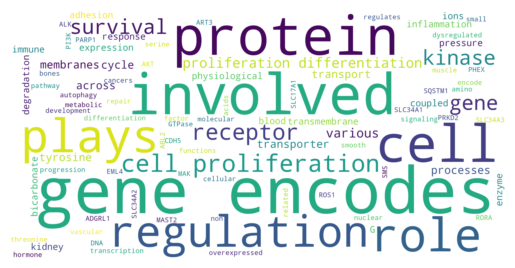

In [10]:
import matplotlib.pyplot as plt
plt.imshow(wc_rect, interpolation='bilinear')
plt.axis("off")